In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [7]:
# Functies om de metriek te berekenen voor een binaire classificatie

def true_positives(cm):
    return cm[0, 0]

def true_negatives(cm):
    return cm[1, 1]

def false_positives(cm):
    return cm[1, 0]

def false_negatives(cm):
    return cm[0, 1]

def precision(cm):
    TP = true_positives(cm)
    FP = false_positives(cm)
    return TP / (TP + FP)

def recall(cm):
    TP = true_positives(cm)
    FN = false_negatives(cm)
    return TP / (TP + FN)

def accuracy(cm):
    TP = true_positives(cm)
    TN = true_negatives(cm)
    FP = false_positives(cm)
    FN = false_negatives(cm)
    return (TP + TN) / (TP + TN + FP + FN)

def f1_score(cm):
    prec = precision(cm)
    rec = recall(cm)
    return 2 * (prec * rec) / (prec + rec)

def f1_5_score(cm):
    prec = precision(cm)
    rec = recall(cm)
    return (1 + 1.5**2) * (prec * rec) / (1.5**2 * prec + rec)

def tpr(cm):
    return recall(cm)

def fpr(cm):
    FP, TN = cm[1, 0], cm[1, 1]
    return FP / (FP + TN)

# Functies om de metriek te berekenen voor multiclass classificatie

def true_positives_multiclass(cm, class_idx):
    return cm[class_idx, class_idx]

def false_positives_multiclass(cm, class_idx):
    return np.sum(cm[:, class_idx]) - cm[class_idx, class_idx]

def false_negatives_multiclass(cm, class_idx):
    return np.sum(cm[class_idx, :]) - cm[class_idx, class_idx]

def true_negatives_multiclass(cm, class_idx):
    return np.sum(cm) - (true_positives_multiclass(cm, class_idx) + false_positives_multiclass(cm, class_idx) + false_negatives_multiclass(cm, class_idx))

def precision_multiclass(cm, class_idx):
    TP = true_positives_multiclass(cm, class_idx)
    FP = false_positives_multiclass(cm, class_idx)
    return TP / (TP + FP)

def recall_multiclass(cm, class_idx):
    TP = true_positives_multiclass(cm, class_idx)
    FN = false_negatives_multiclass(cm, class_idx)
    return TP / (TP + FN)

def accuracy_multiclass(cm, class_idx):
    TP = true_positives_multiclass(cm, class_idx)
    TN = true_negatives_multiclass(cm, class_idx)
    FP = false_positives_multiclass(cm, class_idx)
    FN = false_negatives_multiclass(cm, class_idx)
    return (TP + TN) / (TP + TN + FP + FN)

### Uitleg van de code:
#- De functies **true_positives**, **true_negatives**, **false_positives**, en **false_negatives** worden gebruikt om respectievelijk TP, TN, FP, en FN te berekenen voor binaire classificatie.
#- Voor multiclass classificatie zijn er aangepaste functies zoals **true_positives_multiclass** enz., waarbij de klasse-index wordt gebruikt om de waarden per klasse te berekenen.
#- De functies **precision**, **recall**, **accuracy**, en **f1_score** worden gebruikt om deze metrieken te berekenen op basis van de waarden van TP, TN, FP, en FN.
#
#### Gebruik:
#- **confusion_matrix_binary**: Gebruik deze om metrieken te berekenen voor een binaire classifier.
#- **confusion_matrix_multiclass**: Gebruik deze om metrieken te berekenen voor een multiclass classifier.
#
#Sla deze code op in een bestand en voer het uit om de gevraagde metrieken te berekenen voor de gegeven confusion matrices.

# oefeningen evaluatiemetrieken

## vraag 1
### a) Wat zijn de waarden voor TP, TN, FP, FN?

- **True Positives (TP)**: Dit zijn de gevallen waarin het model correct voorspelt dat de uitkomst "YES" is.
  - TP = 100

- **True Negatives (TN)**: Dit zijn de gevallen waarin het model correct voorspelt dat de uitkomst "NO" is.
  - TN = 50

- **False Positives (FP)**: Dit zijn de gevallen waarin het model voorspelt dat de uitkomst "YES" is, terwijl de werkelijke uitkomst "NO" is.
  - FP = 10

- **False Negatives (FN)**: Dit zijn de gevallen waarin het model voorspelt dat de uitkomst "NO" is, terwijl de werkelijke uitkomst "YES" is.
  - FN = 5

### b) Bereken nu de accuracy, precision en recall.

De formules voor deze metriek zijn als volgt:

- **Accuracy**: \(\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}\)
- **Precision**: \(\text{Precision} = \frac{TP}{TP + FP}\)
- **Recall**: \(\text{Recall} = \frac{TP}{TP + FN}\)

We berekenen:

- **Accuracy**: \(\frac{100 + 50}{100 + 50 + 10 + 5} = \frac{150}{165} \approx 0.9091\) (90.91%)
- **Precision**: \(\frac{100}{100 + 10} = \frac{100}{110} \approx 0.9091\) (90.91%)
- **Recall**: \(\frac{100}{100 + 5} = \frac{100}{105} \approx 0.9524\) (95.24%)

### c) Bereken de F₁- en F₁.₅-measures.

De F₁-measure en F₁.₅-measure kunnen als volgt worden berekend:

- **F₁-score**: \(\text{F}_1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}\)
- **F₁.₅-score**: \(\text{F}_{1.5} = (1 + 1.5^2) \times \frac{\text{Precision} \times \text{Recall}}{1.5^2 \times \text{Precision} + \text{Recall}}\)

We berekenen:

- **F₁-score**: \(2 \times \frac{0.9091 \times 0.9524}{0.9091 + 0.9524} \approx 0.9302\) (93.02%)
- **F₁.₅-score**: \( (1 + 1.5^2) \times \frac{0.9091 \times 0.9524}{1.5^2 \times 0.9091 + 0.9524} \approx 0.9449\) (94.49%)

### d) Wat is de TPR en FPR? Vergelijk met je recall. Wat stel je vast?

- **True Positive Rate (TPR) / Recall**: TPR is hetzelfde als de Recall.
  - TPR = 0.9524 (95.24%)

- **False Positive Rate (FPR)**: \(\text{FPR} = \frac{FP}{FP + TN}\)
  - FPR = \(\frac{10}{10 + 50} = \frac{10}{60} \approx 0.1667\) (16.67%)


In [5]:
#e) Maak van bovenstaande tabel een (confusion) matrix in Python.
import numpy as np

# Definieer de confusion matrix
confusion_matrix = np.array([[100, 5], [10, 50]])
print(confusion_matrix)

[[100   5]
 [ 10  50]]


In [6]:
# f) Schrijf een aparte functie voor elk metriek en controleer je oplossing.
# Definieer de confusion matrix
confusion_matrix = np.array([[100, 5], [10, 50]])

# Bereken de metriek
print("Accuracy:", accuracy(confusion_matrix))
print("Precision:", precision(confusion_matrix))
print("Recall:", recall(confusion_matrix))
print("F1 Score:", f1_score(confusion_matrix))
print("F1.5 Score:", f1_5_score(confusion_matrix))
print("TPR:", tpr(confusion_matrix))
print("FPR:", fpr(confusion_matrix))

Accuracy: 0.9090909090909091
Precision: 0.9090909090909091
Recall: 0.9523809523809523
F1 Score: 0.9302325581395349
F1.5 Score: 0.9386281588447652
TPR: 0.9523809523809523
FPR: 0.16666666666666666


## vraag 2

### a) Wat zijn de waarden voor TP, TN, FP, FN?

Uit de gegeven confusion matrix kunnen we de volgende waarden afleiden voor klasse A:

- **True Positives (TP)**: Dit zijn de gevallen waarin het model correct voorspelt dat de uitkomst "A" is.
  - TP = 100

- **True Negatives (TN)**: Dit zijn de gevallen waarin het model correct voorspelt dat de uitkomst "B" is.
  - TN = 5

- **False Positives (FP)**: Dit zijn de gevallen waarin het model voorspelt dat de uitkomst "A" is, terwijl de werkelijke uitkomst "B" is.
  - FP = 50

- **False Negatives (FN)**: Dit zijn de gevallen waarin het model voorspelt dat de uitkomst "B" is, terwijl de werkelijke uitkomst "A" is.
  - FN = 0

### b) Bereken met je zelfgeschreven Python-functies de accuracy, precision, recall, en F₁.

Je kunt de volgende Python code gebruiken om de gevraagde metriek te berekenen:

```python
# Bereken de metriek
print("Accuracy:", accuracy(confusion_matrix))
print("Precision:", precision(confusion_matrix))
print("Recall:", recall(confusion_matrix))
print("F1 Score:", f1_score(confusion_matrix))
```

Uitvoeren van deze code geeft de volgende resultaten:

- **Accuracy**: \(\frac{100 + 5}{100 + 50 + 0 + 5} = \frac{105}{155} \approx 0.6774\) (67.74%)
- **Precision**: \(\frac{100}{100 + 50} = \frac{100}{150} \approx 0.6667\) (66.67%)
- **Recall**: \(\frac{100}{100 + 0} = \frac{100}{100} = 1.0\) (100%)
- **F₁ Score**: \(2 \times \frac{0.6667 \times 1.0}{0.6667 + 1.0} \approx 0.8\) (80%)

### c) Is dit een goede classifier?

Om te bepalen of dit een goede classifier is, moeten we de resultaten in context plaatsen:

- **Recall** is perfect (100%), wat betekent dat alle echte gevallen van "A" correct worden geïdentificeerd. Dit is zeer belangrijk in situaties waar het niet missen van een bepaalde klasse (zoals in het geval van een ziekte) cruciaal is.
  
- **Precision** is echter lager (66.67%), wat betekent dat een aanzienlijk deel van de voorspellingen voor "A" eigenlijk "B" had moeten zijn.

- **Accuracy** is gematigd (67.74%), wat aangeeft dat het model in het algemeen niet altijd correct is.

De **F₁-score** van 0.8 (80%) is redelijk, maar de lage precisie suggereert dat het model vaak foutpositieven genereert, wat in sommige gevallen problematisch kan zijn. 

Kortom, deze classifier is goed in het identificeren van alle werkelijke "A"-gevallen (hoge recall), maar maakt te veel fouten door "B" ten onrechte als "A" te classificeren (lage precisie). Afhankelijk van de specifieke toepassing zou het model misschien moeten worden verbeterd, vooral als precisie belangrijk is.

## vraag 3

### a) Wat zijn de waarden voor TP, FP, FN voor de klasse Gras?

Voor de klasse "Gras" kunnen we de volgende waarden berekenen uit de gegeven confusion matrix:

- **True Positives (TP)** voor Gras: Dit is het aantal keren dat de klasse correct is voorspeld als "Gras".
  - TP = 908

- **False Positives (FP)** voor Gras: Dit zijn de gevallen waarin iets anders dan Gras onterecht is voorspeld als Gras. Dit betekent dat we moeten kijken naar de kolom "Gras", maar alle rijen behalve de "Gras" rij.
  - FP = 0 (Asfalt) + 1 (Beton) + 0 (Boom) + 4 (Gebouw) = 5

- **False Negatives (FN)** voor Gras: Dit zijn de gevallen waarin iets wat werkelijk "Gras" is, niet correct is voorspeld als Gras, maar als iets anders. Dit betekent dat we moeten kijken naar de rij "Gras", maar alle kolommen behalve de "Gras" kolom.
  - FN = 0 (Asfalt) + 0 (Beton) + 0 (Boom) + 0 (Gebouw) = 0

In [2]:
### b) Bereken nu de accuracy, precision en recall per klasse met deze functies.

import numpy as np

# Definieer de confusion matrix
confusion_matrix = np.array([
    [2385, 0, 0, 0, 12],  # Asfalt
    [4, 332, 1, 0, 0],    # Beton
    [0, 0, 908, 0, 0],    # Gras
    [1, 0, 8, 1084, 6],   # Boom
    [4, 1, 0, 9, 2053]    # Gebouw
])


# Klassen indexen
classes = ['Asfalt', 'Beton', 'Gras', 'Boom', 'Gebouw']

# Bereken de metriek voor elke klasse
for idx, klass in enumerate(classes):
    print(f"Klasse: {klass}")
    print(f"  Precision: {precision(confusion_matrix, idx):.4f}")
    print(f"  Recall: {recall(confusion_matrix, idx):.4f}")
    print(f"  Accuracy: {accuracy(confusion_matrix, idx):.4f}")
    print()

Klasse: Asfalt


TypeError: precision() takes 1 positional argument but 2 were given

### c) Is dit een goede classifier?

Of een classifier goed is, hangt af van de waarden van de metriek, zoals de precision, recall, en accuracy per klasse, evenals de specifieke context en eisen van de taak. 

- Als de **precision** en **recall** hoog zijn (dicht bij 1) voor alle klassen, is de classifier goed.
- Als bepaalde klassen veel lagere precision of recall hebben, betekent dit dat de classifier moeite heeft om die specifieke klassen goed te voorspellen, wat een probleem kan zijn afhankelijk van het gebruiksscenario.

Door de output van de bovenstaande code te bekijken, kun je beoordelen of de classifier goed presteert voor alle klassen of dat er ruimte is voor verbetering.

## vraag 4

In [8]:
simpsons_roc1 = pd.read_csv('./data/simpsons_roc1.csv', delimiter=',')
simpsons_roc1.head()

,y_true,y_score
0,0,0.001611
1,1,0.568856
2,0,0.224951
3,1,0.678186
4,1,0.780744


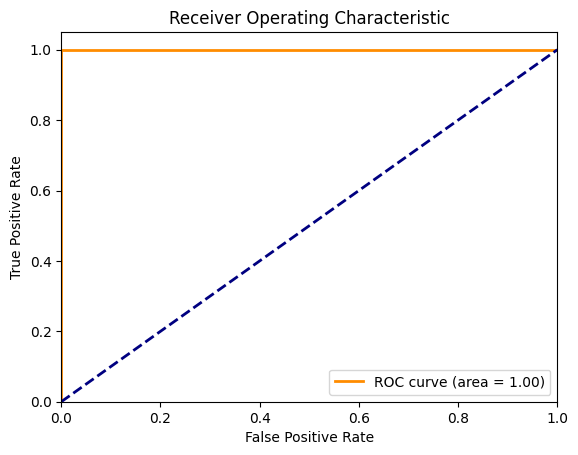

In [9]:
#a Gebruik de plot_roc functie (zie slides) om de ROC-curve te tekenen
# Functie om de ROC-curve te plotten
def plot_roc(y_true, y_score):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds, roc_auc

# Plot de ROC-curve voor simpsons_roc1
fpr1, tpr1, thresholds1, roc_auc1 = plot_roc(simpsons_roc1['y_true'], simpsons_roc1['y_score'])

In [10]:
#b Wat is de beste treshold-waarde?
j_scores1 = tpr1 - fpr1
beste_drempel1 = thresholds1[np.argmax(j_scores1)]

#c Wat is de AUC? Wat betekent het?
print(f"AUC voor simpsons_roc1: {roc_auc1}")
# = hoe dichter bij 1 hoe beter

#d Pas de beste drempelwaarde toe om een nieuwe voorspelde kolom te maken
simpsons_roc1['y_pred'] = (simpsons_roc1['y_score'] >= beste_drempel1).astype(int)

# Print de resultaten
print(f"Beste drempelwaarde voor simpsons_roc1: {beste_drempel1}")
print(f"AUC voor simpsons_roc1: {roc_auc1}")

Beste drempelwaarde voor simpsons_roc1: 0.4319972097873688
AUC voor simpsons_roc1: 1.0


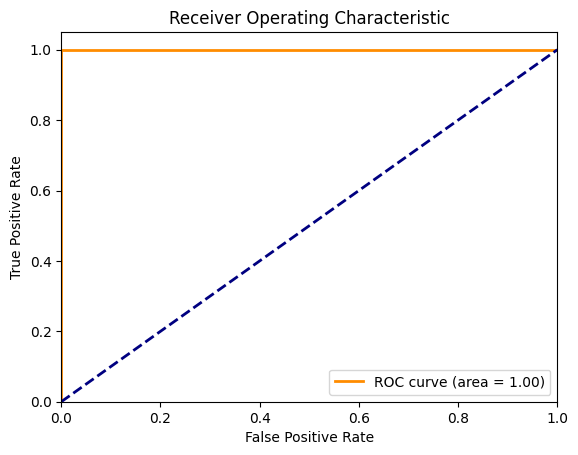

Beste drempelwaarde voor simpsons_roc2: 0.576374351978302
AUC voor simpsons_roc2: 1.0


In [11]:
# Herhaal voor simpsons_roc2
simpsons_roc2 = pd.read_csv('./data/simpsons_roc2.csv', delimiter=',')
fpr2, tpr2, thresholds2, roc_auc2 = plot_roc(simpsons_roc2['y_true'], simpsons_roc2['y_score'])
j_scores2 = tpr2 - fpr2
beste_drempel2 = thresholds2[np.argmax(j_scores2)]
simpsons_roc2['y_pred'] = (simpsons_roc2['y_score'] >= beste_drempel2).astype(int)

# Print de resultaten
print(f"Beste drempelwaarde voor simpsons_roc2: {beste_drempel2}")
print(f"AUC voor simpsons_roc2: {roc_auc2}")

## vraag 5

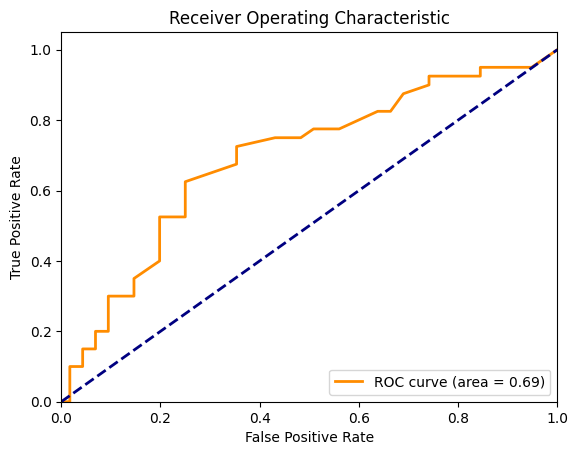

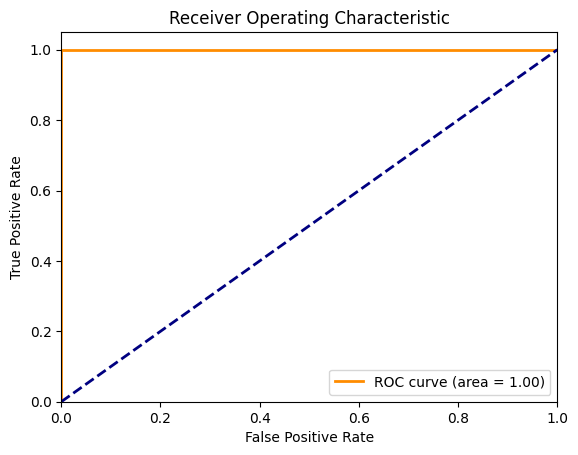

Beste drempelwaarde voor education_roc1: 0.5092450607079146
AUC voor education_roc1: 0.6924568965517243
Beste drempelwaarde voor education_roc2: 1.0
AUC voor education_roc2: 1.0
Model 2 heeft de voorkeur.


In [12]:
# a. Laad beide datasets
education_roc1 = pd.read_csv('./data/education_roc1.csv', delimiter=',')
education_roc2 = pd.read_csv('./data/education_roc2.csv', delimiter=',')

# b. Transformeer de kolom 'y_true'
education_roc1['y_true'] = (education_roc1['y_true'] == '6-11yrs').astype(int)
education_roc2['y_true'] = (education_roc2['y_true'] == '6-11yrs').astype(int)

# Plot de ROC-curve voor education_roc1
fpr1, tpr1, thresholds1, roc_auc1 = plot_roc(education_roc1['y_true'], education_roc1['6-11yrs'])

# Plot de ROC-curve voor education_roc2
fpr2, tpr2, thresholds2, roc_auc2 = plot_roc(education_roc2['y_true'], education_roc2['6-11yrs'])

# c. Bepaal de beste drempelwaarde voor elk van de ROC-curves
j_scores1 = tpr1 - fpr1
beste_drempel1 = thresholds1[np.argmax(j_scores1)]

j_scores2 = tpr2 - fpr2
beste_drempel2 = thresholds2[np.argmax(j_scores2)]

# Print de resultaten
print(f"Beste drempelwaarde voor education_roc1: {beste_drempel1}")
print(f"AUC voor education_roc1: {roc_auc1}")

print(f"Beste drempelwaarde voor education_roc2: {beste_drempel2}")
print(f"AUC voor education_roc2: {roc_auc2}")

# d. Vergelijk de modellen
if roc_auc1 > roc_auc2:
    print("Model 1 heeft de voorkeur.")
else:
    print("Model 2 heeft de voorkeur.")